In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv('/Users/pulkit/Downloads/TensorFlow_FILES 2/DATA/lending_club_loan_two.csv')

In [197]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [199]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

<Figure size 1000x600 with 0 Axes>

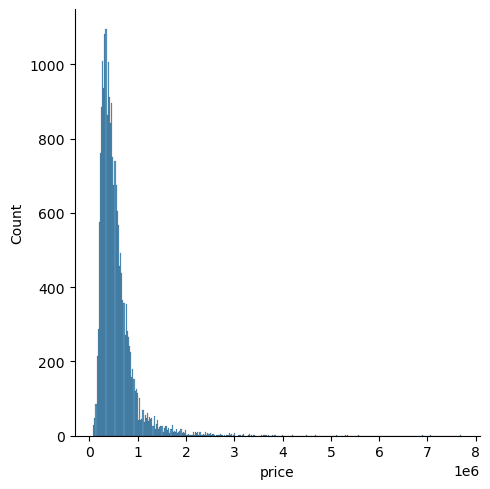

In [25]:
plt.figure(figsize =(10,6))
sns.displot(x='price',data=df)
plt.tight_layout

<Axes: xlabel='bedrooms', ylabel='count'>

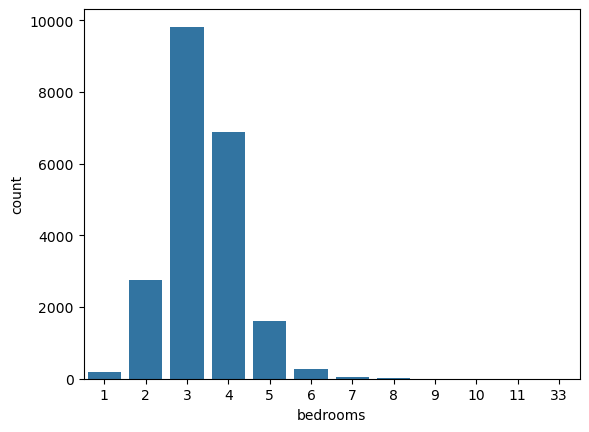

In [27]:
sns.countplot(x='bedrooms',data=df)

<Axes: >

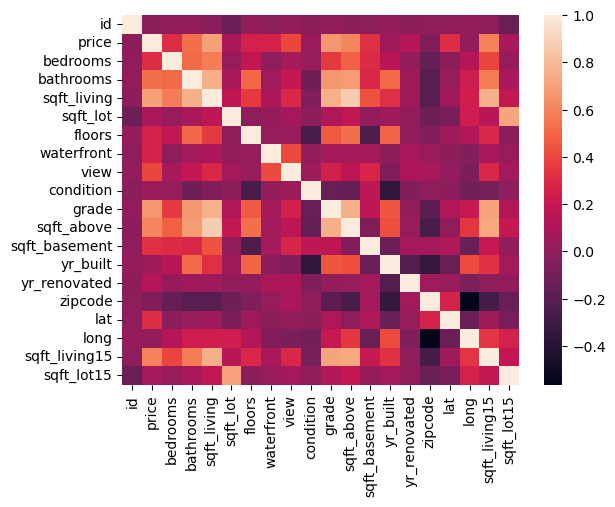

In [35]:
sns.heatmap(df.drop('date',axis=1).corr())

In [37]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='lat', ylabel='price'>

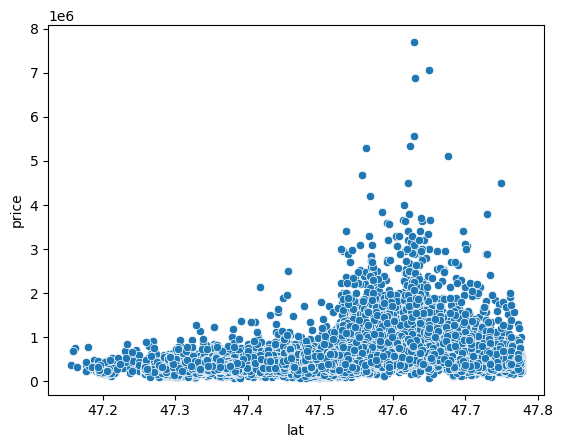

In [41]:
sns.scatterplot(x='lat',y='price',data=df)

In [43]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [47]:
df['year'] = df['date'].apply(lambda date: date.year)

In [49]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

In [71]:
def is_ren(year):
    if year != 0:
        return 1
    else:
        return 0

In [73]:
df['yr_renovated'] = df['yr_renovated'].apply(is_ren)

In [97]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year'],
      dtype='object')

In [95]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [99]:
X = df.drop(['price','id','date'],axis=1)
y= df['price']

In [101]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [109]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [117]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss = 'mse')

In [121]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 421380718592.0000 - val_loss: 418982068224.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 425850798080.0000 - val_loss: 418904342528.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 449817935872.0000 - val_loss: 418520334336.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 433430790144.0000 - val_loss: 417234780160.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 418018131968.0000 - val_loss: 413971316736.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 426082402304.0000 - val_loss: 407038787584.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 414740807680.0000 - val_loss: 394316742656.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 411675492352.0000 - val_loss: 373772812288.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 376035049472.0000 - val_loss: 343510089728.0000
Epo

In [125]:
losses = pd.DataFrame(model.history.history)

<Axes: >

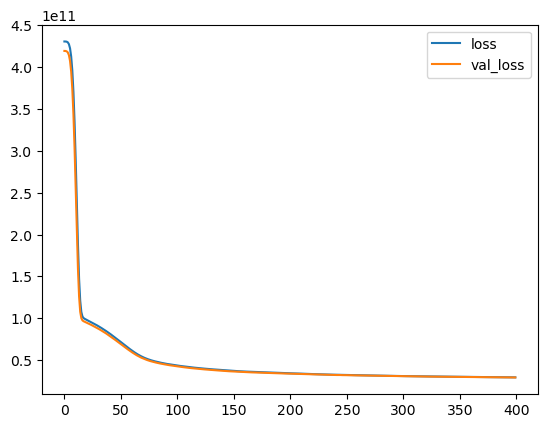

In [129]:
losses.plot()

In [131]:
df = pd.read_csv('/Users/pulkit/Downloads/TensorFlow_FILES 2/DATA/cancer_classification.csv')

In [145]:
df.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

In [157]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<Axes: >

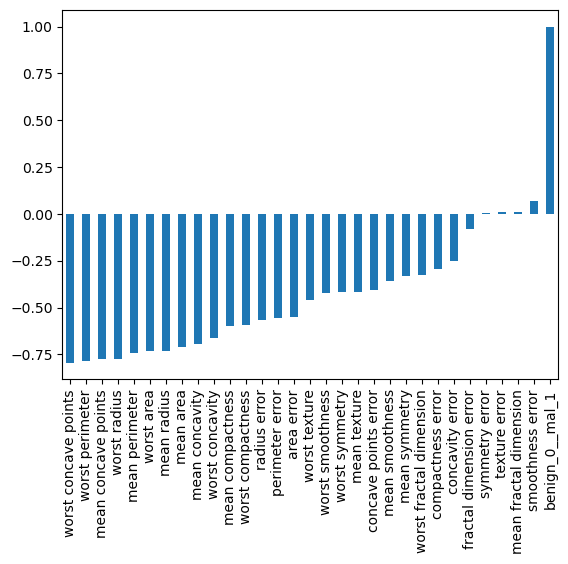

In [155]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [159]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
from sklearn.model_selection import train_test_split

In [165]:
X = df.drop('benign_0__mal_1',axis=1)
y=df['benign_0__mal_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [167]:
scaler.fit(X_train)

MinMaxScaler()

In [169]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [173]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [175]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600)

Epoch 1/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6850 - val_loss: 0.6395
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6388 - val_loss: 0.5922
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5897 - val_loss: 0.5372
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5357 - val_loss: 0.4744
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4791 - val_loss: 0.4027
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4128 - val_loss: 0.3410
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3481 - val_loss: 0.2917
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3018 - val_loss: 0.2561
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2712 - val_loss: 0.2289
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2281 - val_loss: 0.2089
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2136 - val_loss: 0.1924
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2

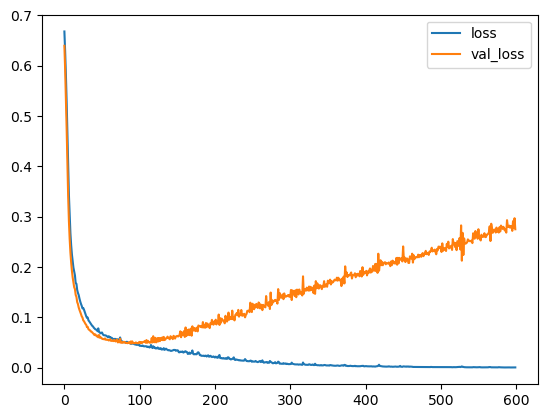

In [181]:
losses = pd.DataFrame(model.history.history).plot()

In [179]:
losses

,loss,val_loss
0,0.667964,0.639535
1,0.628183,0.592186
2,0.581743,0.537232
3,0.527964,0.474385
4,0.464130,0.402692
...,...,...
595,0.000479,0.271882
596,0.000664,0.291121
597,0.000713,0.278184
598,0.000567,0.296985


In [183]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [185]:
from tensorflow.keras.callbacks import EarlyStopping

In [187]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose = 1,patience=25)

In [191]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=600,callbacks=[early_stop])

Epoch 1/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6848 - val_loss: 0.6657
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6641 - val_loss: 0.6388
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6335 - val_loss: 0.6002
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5970 - val_loss: 0.5558
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5482 - val_loss: 0.5101
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5104 - val_loss: 0.4647
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4703 - val_loss: 0.4152
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4068 - val_loss: 0.3690
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3723 - val_loss: 0.3300
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3549 - val_loss: 0.2953
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3007 - val_loss: 0.2663
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

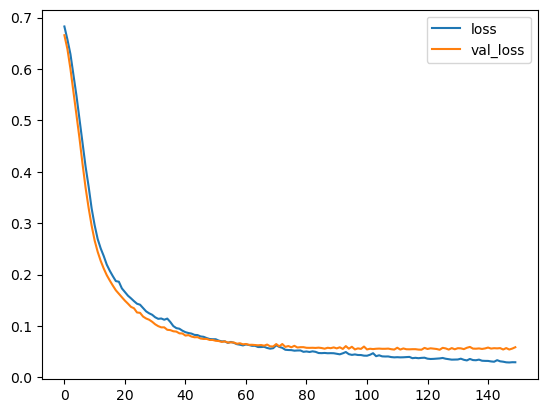

In [193]:
losses = pd.DataFrame(model.history.history).plot()